import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

# List of file paths
file_paths = [f'data/HH{i:02d}_all1.csv' for i in range(1, 31)]

# Words to filter out
filter_words = ['wind', 'rain', 'solar', 'hpa']

# Dictionary to store DataFrames
dataframes = {}

# Load and rename columns for each DataFrame
for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    # Rename 'Unnamed: 0' to 'date'
    df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    # Rename other columns to include file identifier
    df.columns = [f'{col}_{i}' if col != 'date' else col for col in df.columns]
    # Filter out columns containing any of the filter words
    df = df[[col for col in df.columns if not any(word in col.lower() for word in filter_words)]]
    # Set 'date' as index
    df.set_index('date', inplace=True)
    # Store DataFrame in dictionary
    dataframes[i] = df

# Combine all DataFrames on the 'date' index using outer join
combined_df = pd.concat(dataframes.values(), axis=1, join='inner')

# Find the mean value for each group of similar columns
mean_df = pd.DataFrame(index=combined_df.index)

# Group columns by their base name (before the suffix)
for base_col in set(col.rsplit('_', 1)[0] for col in combined_df.columns):
    similar_cols = [col for col in combined_df.columns if col.startswith(base_col)]
    if similar_cols:
        mean_df[f'{base_col}_mean'] = combined_df[similar_cols].mean(axis=1)

# Display the DataFrame with mean values
mean_df.dtypes


plt.plot(mean_df['bed_temp_mean'])
plt.show()

memory_usage = mean_df.memory_usage(deep=True)
total_memory = memory_usage.sum()

print("Memory usage by column (in bytes):")
print(memory_usage)
print(f"Total memory usage: {total_memory / (1024 ** 2):.2f} MB")

In [9]:
import pandas as pd
from functools import reduce

# List of file paths
file_paths = [f'data/HH{i:02d}_all1.csv' for i in range(1, 31)]

# Words to filter out
filter_words = ['wind', 'rain', 'solar', 'atoms']

# List to store DataFrames
dataframes = []

# Load and rename columns for each DataFrame
for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    # Rename 'Unnamed: 0' to 'date'
    df.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
    # Rename other columns to include file identifier
    df.columns = [f'{col}_{i}' if col != 'date' else col for col in df.columns]
    # Filter out columns containing any of the filter words
    df = df[[col for col in df.columns if not any(word in col.lower() for word in filter_words)]]
    # Append DataFrame to the list
    dataframes.append(df)

# Perform inner join on the 'date' column for all DataFrames
combined_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dataframes)

# Find the mean value for each group of similar columns
mean_df = pd.DataFrame()
mean_df['date'] = combined_df['date']

# Group columns by their base name (before the suffix)
for base_col in set(col.rsplit('_', 1)[0] for col in combined_df.columns if col != 'date'):
    similar_cols = [col for col in combined_df.columns if col.startswith(base_col)]
    if similar_cols:
        mean_df[f'{base_col}_mean'] = combined_df[similar_cols].mean(axis=1, skipna= True)

# Display the DataFrame with mean values
print(mean_df.head())


               date  frontbed_temp_mean  kit_temp_mean  dining_temp_mean  \
0  08/03/2020 00:00           20.830381      20.686141             22.30   
1  08/03/2020 00:30           20.510556      20.601630             20.52   
2  08/03/2020 01:00           20.618714      20.355975             20.08   
3  08/03/2020 01:30           20.521286      20.136840             19.68   
4  08/03/2020 02:00           20.732722      20.348987             21.17   

   backroom_temp_mean  bath_hum_mean  toilet_hum_mean  smallbed_temp_mean  \
0                 NaN      53.743913             42.8              21.850   
1               21.07      55.335417             43.5              21.845   
2               20.46      55.742800             44.2              21.845   
3               20.20      55.981600             43.5              21.775   
4               19.99      57.528000             43.4              21.800   

   bed_hum_mean  smallbed_hum_mean  ...  backbed_hum_mean  \
0     56.405882    

In [10]:
memory_usage = mean_df.memory_usage(deep=True)
total_memory = memory_usage.sum()

print("Memory usage by column (in bytes):")
print(memory_usage)
print(f"Total memory usage: {total_memory / (1024 ** 2):.2f} MB")

Memory usage by column (in bytes):
Index                              132
date                           1349040
frontbed_temp_mean              147840
kit_temp_mean                   147840
dining_temp_mean                147840
backroom_temp_mean              147840
bath_hum_mean                   147840
toilet_hum_mean                 147840
smallbed_temp_mean              147840
bed_hum_mean                    147840
smallbed_hum_mean               147840
hall_temp_mean                  147840
frontbedabovedoor_hum_mean      147840
Air temp (degC)_mean            147840
backbed_temp_mean               147840
rightbed_temp_mean              147840
leftbed_hum_mean                147840
util_hum_mean                   147840
backroom_hum_mean               147840
mediumbed_temp_mean             147840
smallliv_temp_mean              147840
rearbed_temp_mean               147840
frontbed_hum_mean               147840
box_hum_mean                    147840
liv_temp_mean                

In [11]:
import matplotlib.pyplot as plt


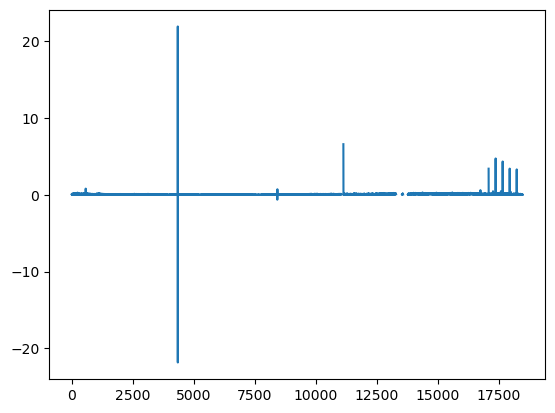

In [12]:
plt.plot(mean_df['Gas m3_mean'])
plt.show()

In [13]:
mean_df['Gas m3_mean'].describe()

count    17901.000000
mean         0.053582
std          0.249310
min        -21.821333
25%          0.015667
50%          0.036333
75%          0.078667
max         21.902333
Name: Gas m3_mean, dtype: float64

In [14]:
mean_df.to_csv('all_HH_combined_mean.csv')


In [15]:
import pandas as pd

# List of file paths
file_paths = [f'data/HH{i:02d}_all1.csv' for i in range(1, 31)]

# List to store filenames with columns containing "box"
files_with_box_columns = []

# Iterate through each file and check for columns containing "box"
for i, file_path in enumerate(file_paths, start=1):
    df = pd.read_csv(file_path)
    # Check if any column contains the substring "box"
    if any('box' in col.lower() for col in df.columns):
        files_with_box_columns.append(file_path)

# Print the filenames that contain columns with "box"
print("CSV files containing columns with 'box':")
for file in files_with_box_columns:
    print(file)

    

CSV files containing columns with 'box':
data/HH15_all1.csv
data/HH26_all1.csv
data/HH30_all1.csv
